In [1]:
import numpy as np
import pandas as pd 

In [3]:
path='C:\\Users\dmckenzie\Downloads\RoomNames.csv'

In [4]:
RC=pd.read_csv(path)

In [5]:
RC=RC.dropna().reset_index()

In [6]:
RC['Name'].tail(30)

18203                                  YARD MANAGER OFFICE
18204                                         YARD STORAGE
18205                                             YEARBOOK
18206                                           YELLOW POD
18207                                    YES / EQUITY PLUS
18208                                           YES OFFICE
18209                                      YES/EQUITY PLUS
18210                                      YES/OASIS CONV.
18211                                                 YOGA
18212                                   YOGA & CARDIO ROOM
18213                                               YOGA 1
18214                                               YOGA 2
18215                                            YOGA AREA
18216                                            Yoga Room
18217                                         YOGA STORAGE
18218                                          YOGA STUDIO
18219                                    YOGA/BARRE STUD

In [7]:
RC['Name2']=RC['Name'].str.lower().str.replace('\d+','').str.replace("_"," ").str.lstrip()
#.str.replace(r"\(.*\)","")

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [8]:
RC['Name2']=RC['Name2'].str.lower().str.replace('area','room')\
            .str.replace("space","room")\
            .str.replace("studio","room")\
            .str.replace("lounge","room")

In [9]:
"area",'room','space','studio','lounge'

('area', 'room', 'space', 'studio', 'lounge')

In [10]:
RC.drop_duplicates(subset=['Name2']).reset_index().tail(20)

,level_0,index,Name,Name2
15710,18209,18211,YES/EQUITY PLUS,yes/equity plus
15711,18210,18212,YES/OASIS CONV.,yes/oasis conv.
15712,18211,18213,YOGA,yoga
15713,18212,18214,YOGA & CARDIO ROOM,yoga & cardio room
15714,18213,18215,YOGA 1,yoga
15715,18215,18217,YOGA AREA,yoga room
15716,18217,18219,YOGA STORAGE,yoga storage
15717,18219,18221,YOGA/BARRE STUDIO,yoga/barre room
15718,18220,18222,YOUTH LOUNGE,youth room
15719,18221,18223,YOUTH RR,youth rr


In [11]:
def get_ngrams(series: pd.Series,n:int):
    ngrams = series.copy().str.split(' ').explode()
    ngrams1 = series.copy().str.split(' ').explode()
    for i in range(1,n):
        foo=ngram1.groupby(level=0).shift(-i)
        ngrams=ngrams.str.cat(foo,sep=' ')
    ngrams = ngram.dropna()
    return pd.DataFrame(ngrams)

In [12]:
def get_multigrams(series,n):
    grams=get_ngrams(series,1)
    if n==1:
        return grams
    else:
        for i in range(1,n+1):
            if i==1:
                continue
            grams=grams.append(get_ngrams(series,i))
    return grams

In [13]:
import nltk

In [14]:
#get_multigrams(RC['Name2'],3)

In [15]:
from nltk import word_tokenize

In [16]:
RC['Name2Tokens']=RC.dropna()['Name2'].replace(r'[<%]', '', regex=True).apply(word_tokenize)

In [17]:
from gensim.models import Word2Vec

In [18]:
from gensim.models import FastText

In [19]:
model2 = FastText(RC['Name2Tokens'])

In [20]:
model = Word2Vec(RC['Name2Tokens'])

In [21]:
model.most_similar(positive=['office'], topn=10)

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('&', 0.9998759031295776),
 ('and', 0.9998345375061035),
 ('room', 0.9998044967651367),
 ('/', 0.9997982382774353),
 ('-', 0.9997965097427368),
 ('storage', 0.9997928142547607),
 ('+', 0.999786376953125),
 ('future', 0.9997860789299011),
 ('lab', 0.9997581839561462),
 ('lobby', 0.9997463226318359)]

In [15]:
RC['Root']=RC['Name2Tokens'].str[0]

In [20]:
RC['Two']=RC['Name2Tokens'].str[1]

In [70]:
RC['Name'].str.lower().str.contains('classroom').sum()

458

In [73]:
RC['Name'].str.lower().str.contains('|'.join(['restroom','toilet','bathroom'])).sum()

385

In [121]:
import gensim

ModuleNotFoundError: No module named 'gensim'

In [114]:
RC['Name2'].str.lower().str.contains('|'.join(['restroom','toilet','bathroom','surgeon',
                                              'storage','classroom','lobby','lab',
                                              'grade','locker','suite','restroom','nurse',
                                              'closet','conference','elev','office',
                                              'stair','male','female','music','cell','fire',
                                              'public','mech','student','cafe','elec','men',
                                               'hotel','inmate','staff','medical'])).sum()

6365

In [102]:
RC['Name2']

0                                '-
1                     "the library"
2                        () dr. rm.
3                        () dr. rm.
4             () open work stations
                    ...            
18228                         zimas
18229                          zone
18230    zoom vending machine niche
18231                zouher fashion
18232                        zzzzzz
Name: Name2, Length: 18233, dtype: object

In [75]:
RC['Name'].str.lower().str.contains('|'.join(['kitchen'])).sum()

136

In [76]:
RC['Name'].str.lower().str.contains('|'.join(['suite'])).sum()

188

In [109]:
RC['Name2Tokens'].str[0].value_counts()[RC['Name2Tokens'].str[0].value_counts()>50]

(            269
stair        177
unit         169
classroom    152
room         147
staff        146
elev         146
office       116
king         115
.            105
b             99
open          95
small         81
existing      79
a             79
outdoor       75
d             70
storage       68
male          68
main          67
c             67
female        67
music         64
cell          63
fire          63
women         62
public        62
mech          61
student       58
cafe          58
elec          57
men           56
shared        55
suite         55
inmate        53
large         52
future        52
medical       52
hotel         51
Name: Name2Tokens, dtype: int64

In [105]:
RC['Name2Tokens'].str[-1].value_counts()[RC['Name2Tokens'].str[-1].value_counts()>50]

room         1746
.             903
storage       720
office        717
)             516
classroom     313
rm            289
lab           268
#             224
a             181
b             178
lobby         148
suite         128
toilet        122
cell          121
c             120
restroom      120
rr            107
center        106
closet        101
vestibule      93
d              85
stor           83
stair          79
corridor       78
workroom       75
station        74
support        68
shop           65
l              61
kitchen        57
s-             53
locker         52
Name: Name2Tokens, dtype: int64

<AxesSubplot:>

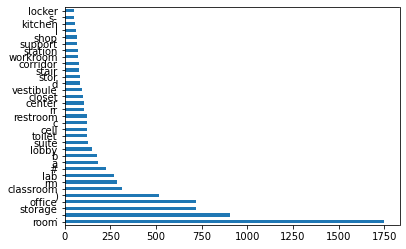

In [65]:
RC['Name2Tokens'].str[-1].value_counts()[RC['Name2Tokens'].str[-1].value_counts()>50].plot(kind='barh')

In [84]:
RC[RC['Name'].str.lower().str.contains('|'.join(['office']))]['Root'].value_counts()[0:20]

office          116
open             39
level            18
officer          11
it               10
pe               10
nurse            10
(                 9
dir               7
dean              7
hr                7
shared            7
correctional      6
computer          5
business          5
eng               5
correction        5
health            5
office/           5
cust              5
Name: Root, dtype: int64

In [74]:
RC['Name2Tokens'].str[-1].value_counts()[RC['Name2Tokens'].str[-1].value_counts()>50]

room         1746
.             903
storage       720
office        717
)             516
classroom     313
rm            289
lab           268
#             224
a             181
b             178
lobby         148
suite         128
toilet        122
cell          121
c             120
restroom      120
rr            107
center        106
closet        101
vestibule      93
d              85
stor           83
stair          79
corridor       78
workroom       75
station        74
support        68
shop           65
l              61
kitchen        57
s-             53
locker         52
Name: Name2Tokens, dtype: int64

In [26]:
len(RC['Root'].value_counts())

4561

In [49]:
RC['Root'].value_counts().reset_index()

,index,Root
0,(,269
1,stair,177
2,unit,169
3,classroom,152
4,room,147
...,...,...
4556,cartwash,1
4557,contemplation,1
4558,raised,1
4559,blimp,1


In [50]:
RootC=RC['Root'].value_counts().reset_index()

In [56]:
RootC[RootC['Root']>50]

,index,Root
0,(,269
1,stair,177
2,unit,169
3,classroom,152
4,room,147
5,staff,146
6,elev,146
7,office,116
8,king,115
9,.,105


<AxesSubplot:>

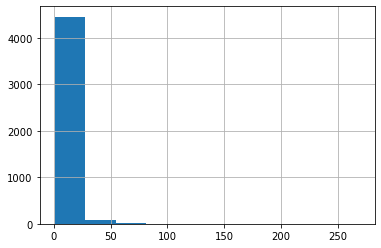

In [48]:
RC['Root'].value_counts().reset_index()['Root'].hist()

In [35]:
RC['Root'].value_counts()[0:60]

(            269
stair        177
unit         169
classroom    152
room         147
staff        146
elev         146
office       116
king         115
.            105
b             99
open          95
small         81
existing      79
a             79
outdoor       75
d             70
storage       68
male          68
main          67
c             67
female        67
music         64
cell          63
fire          63
women         62
public        62
mech          61
student       58
cafe          58
elec          57
men           56
shared        55
suite         55
inmate        53
large         52
future        52
medical       52
hotel         51
it            50
boys          50
girls         49
art           49
th            49
health        48
kitchen       48
science       47
service       46
media         46
admin         46
team          46
work          46
t-            45
tech          45
computer      44
pool          44
teacher       44
elevator      44
ada           

In [21]:
RC['Two'].value_counts()

room         951
.            837
/            487
storage      445
office       432
            ... 
ass            1
surgeon        1
embalming      1
exercise/      1
cnt            1
Name: Two, Length: 1993, dtype: int64